## Project : Wrangle Online Job Postings Dataset
> This project mainly focuses on Data Wrangling and it's importance in Data Analysis. The dataset I'll be wrangling is a dataset of 19,000 online job posts from 2004 to 2015 that were posted through an Armenian human resource portal. 

- After wrangling, I'll analyse and visualize the dataset to answer a basic question for determing the importance of wrangling.

### Question:
>How many people are willing to get the job as soon as possible?

In [1]:

import zipfile
import pandas as pd
import numpy as np
from itertools import cycle, islice

## Gather

In [2]:
with zipfile.ZipFile('armenian-online-job-postings.zip','r') as myzip:
    myzip.extractall()

In [3]:
df=pd.read_csv('online-job-postings.csv')


## Assess

In [4]:
df

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True
5,"Boutique ""Appollo""\r\nJOB TITLE: Saleswoman\r...","Jan 10, 2004",Saleswoman,"Boutique ""Appollo""",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"For further information, please contact Irina\...",NaN,01 February 2004,NaN,NaN,NaN,2004,1,False
6,OSI Assistance Foundation - Armenian Branch Of...,"Jan 11, 2004",Chief Accountant/ Finance Assistant,OSI Assistance Foundation - Armenian Branch Of...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"For submission of applications/ CVs, please\r\...",NaN,"16 January 2004, 6:00 pm.",NaN,NaN,NaN,2004,1,False
7,International Research & Exchanges Board (IREX...,"Jan 13, 2004",Non-paid part or full time Programmatic Intern,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,6 months,...,NaN,"To apply, please download and submit the\r\nap...",NaN,16 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
8,Yerevan Brandy Company \r\nJOB TITLE: Assista...,"Jan 13, 2004",Assistant to Managing Director,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"27 January 2004, 18:00",NaN,NaN,NaN,2004,1,False
9,American Embassy Yerevan\r\nANNOUNCEMENT NUMBE...,"Jan 13, 2004","Program Assistant (INL), FSN-8; FP-6*",American Embassy Yerevan\r\nANNOUNCEMENT NUMBE...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Interested candidates for this position should...,NaN,26 January 2004 \r\nDrafted: GSargsyan\r\nC...,NaN,NaN,NaN,2004,1,False


### Some Observations:
- There are missing values in the dataset.
- StartDate inconsistencies are present like asap is written in diffeent ways.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost             19001 non-null object
date                19001 non-null object
Title               18973 non-null object
Company             18994 non-null object
AnnouncementCode    1208 non-null object
Term                7676 non-null object
Eligibility         4930 non-null object
Audience            640 non-null object
StartDate           9675 non-null object
Duration            10798 non-null object
Location            18969 non-null object
JobDescription      15109 non-null object
JobRequirment       16479 non-null object
RequiredQual        18517 non-null object
Salary              9622 non-null object
ApplicationP        18941 non-null object
OpeningDate         18295 non-null object
Deadline            18936 non-null object
Notes               2211 non-null object
AboutC              12470 non-null object
Attach              1559 non-null object
Year              

- We need to fix non descriptive column errors to avoid confusion further.


In [6]:
df['Year'].value_counts()

2012    2149
2015    2009
2013    2009
2014    1983
2008    1785
2011    1697
2007    1538
2010    1511
2009    1191
2005    1138
2006    1116
2004     875
Name: Year, dtype: int64

## Clean

#### Define

- Select all nondescriptive and misspelled column headers (ApplicationP, AboutC, RequiredQual, JobRequirment) and replace them with full words (ApplicationProcedure, AboutCompany, RequiredQualifications, JobRequirement)
- Select all records in the StartDate column that have "As soon as possible", "Immediately", etc. and replace the text in those cells with "ASAP".

#### Code

In [24]:
df_clean = df.copy()

> Now, we will select all nondescriptive and misspelled column headers (ApplicationP, AboutC, RequiredQual, JobRequirment) and replace them with full words (ApplicationProcedure, AboutCompany, RequiredQualifications, JobRequirement) using rename function.

In [26]:
df_clean = df_clean.rename(columns={'ApplicationP': 'ApplicationProcedure','AboutC': 'AboutCompany','RequiredQual':'RequiredQualification','JobRequirment':'JobRequirement'})

In [27]:
df_clean.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirement', 'RequiredQualification', 'Salary',
       'ApplicationProcedure', 'OpeningDate', 'Deadline', 'Notes',
       'AboutCompany', 'Attach', 'Year', 'Month', 'IT'],
      dtype='object')

> Select all records in the StartDate column that have "As soon as possible", "Immediately", etc. and replace the text in those cells with "ASAP"

In [28]:
df_clean.StartDate.value_counts()

ASAP                                    4754
Immediately                              773
As soon as possible                      543
Upon hiring                              261
Immediate                                259
Immediate employment                     140
As soon as possible.                      32
01 September 2012                         31
March 2006                                27
November 2006                             22
January 2010                              19
01 February 2005                          17
Immediate job opportunity                 17
February 2014                             17
February 2011                             16
TBD                                       16
September 2010                            16
September 2008                            15
March 2011                                15
February 2007                             14
01 February 2015                          14
01 July 2014                              14
01 Septemb

In [29]:
asap_list = ['Immediately', 'As soon as possible', 'Upon hiring',
             'Immediate', 'Immediate employment', 'As soon as possible.', 'Immediate job opportunity',
             '"Immediate employment, after passing the interview."',
             'ASAP preferred', 'Employment contract signature date',
             'Immediate employment opportunity', 'Immidiately', 'ASA',
             'Asap', '"The position is open immediately but has a flexible start date depending on the candidates earliest availability."',
             'Immediately upon agreement', '20 November 2014 or ASAP',
             'immediately', 'Immediatelly',
             '"Immediately upon selection or no later than November 15, 2009."',
             'Immediate job opening', 'Immediate hiring', 'Upon selection',
             'As soon as practical', 'Immadiate', 'As soon as posible',
             'Immediately with 2 months probation period',
             '12 November 2012 or ASAP', 'Immediate employment after passing the interview',
             'Immediately/ upon agreement', '01 September 2014 or ASAP',
             'Immediately or as per agreement', 'as soon as possible',
             'As soon as Possible', 'in the nearest future', 'immediate',
             '01 April 2014 or ASAP', 'Immidiatly', 'Urgent',
             'Immediate or earliest possible', 'Immediate hire',
             'Earliest  possible', 'ASAP with 3 months probation period.',
             'Immediate employment opportunity.', 'Immediate employment.',
             'Immidietly', 'Imminent', 'September 2014 or ASAP', 'Imediately']


In [30]:
for word in asap_list:
    df_clean.StartDate.replace(word,'ASAP' , inplace=True)

#### Test

In [31]:
df_clean.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirement', 'RequiredQualification', 'Salary',
       'ApplicationProcedure', 'OpeningDate', 'Deadline', 'Notes',
       'AboutCompany', 'Attach', 'Year', 'Month', 'IT'],
      dtype='object')

In [32]:
df_clean['StartDate'].value_counts()

ASAP                                    6856
01 September 2012                         31
March 2006                                27
November 2006                             22
January 2010                              19
February 2014                             17
01 February 2005                          17
February 2011                             16
September 2010                            16
TBD                                       16
March 2011                                15
September 2008                            15
February 2007                             14
01 July 2014                              14
01 February 2015                          14
January 2016                              13
01 September 2010                         13
01 September 2008                         13
01 March 2006                             13
01 April 2014                             12
01 March 2012                             12
01 October 2008                           12
September 

### Analysis and Visualizations:

> Now, we will analyse to answer our question defined earlier.

- With the help of value_counts we will find the number of people who wants the job immediately.

In [33]:
asap_counts=df_clean.StartDate.value_counts()['ASAP']
asap_counts

6856

In [34]:
total_count=df_clean.StartDate.count()
total_count

9675

In [35]:
asap_counts/total_count

0.7086304909560723

> Now we will plot a pie chart to visualize our findings.

In [36]:
import matplotlib.pyplot as plt

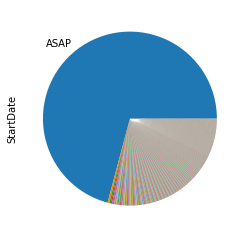

In [37]:
%matplotlib inline
labels=np.full(len(df_clean.StartDate.value_counts()),"",dtype=object)
labels[0]='ASAP'
df_clean.StartDate.value_counts().plot(kind="pie",labels=labels);

> We find that around 71% of the people want jobs asap.

### Importance of wrangling:
> As the main part of this project was data wrangling, lets have a look about what will happen if we do not wrangle our data.
>For this we will, visualize chart on the basis of original dataset which is unclean and messy.

In [20]:
asap_counts=df.StartDate.value_counts()['ASAP']
asap_counts

4754

In [21]:
total_count=df.StartDate.count()
total_count

9675

In [22]:
asap_counts/total_count

0.4913695090439276

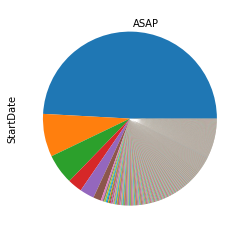

In [23]:
%matplotlib inline
labels=np.full(len(df.StartDate.value_counts()),"",dtype=object)
labels[0]='ASAP'
df.StartDate.value_counts().plot(kind="pie",labels=labels);

> Now, we find that around 49% of the people want jobs asap.

## Conclusions:

This project gives an idea about detalied process of Data Wrangling. 
It also identifies the importance of wrangling as we observed that after that wrangling people who wanted jobs asap was 71% whereas while performing visualizations on the unclean data, the observation was 49%.
This creates too much difference in our results and it could lead to wrong predictions.